In [1]:
import tensorflow as tf
import tensorflowjs as tfjs

# TensorFlow 모델을 로드합니다.
model = tf.keras.models.load_model('./models/dog_breed_model1.h5')

In [2]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 224, 224, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                           

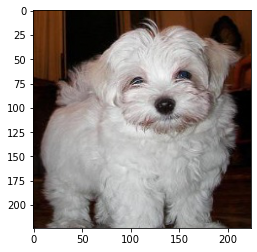

In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


image_name = os.listdir('./test/Maltese')[0]
image = np.array(Image.open('./test/Maltese/' + image_name))
plt.imshow(image/255)

In [13]:
predict = model(image.reshape(-1, 224, 224, 3))

In [15]:
breed_list = ['Shih-Tzu', 'Maltese', 'Yorkie', 'Poodle', 'Golden Retriever', 'Bulldog', 'Corgi', 'Beagle']
breed_list[np.argmax(predict[0])]

'Maltese'

In [18]:
rates = tf.nn.softmax(predict)
rates[0][np.argmax(predict[0])] * 100

<tf.Tensor: shape=(), dtype=float32, numpy=97.74908>

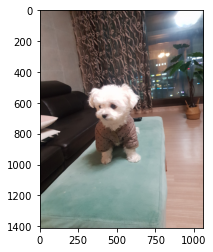

In [20]:
image = np.array(Image.open('./test/Maltese/my_dog1.jpg'))
plt.imshow(image/255)

In [21]:
image.shape

(1411, 1058, 3)

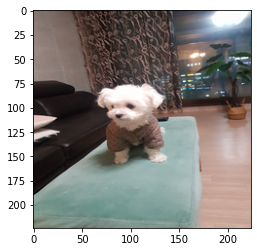

In [38]:
image = Image.open('./test/Maltese/my_dog1.jpg')
image = image.resize((224, 224), Image.LANCZOS)
image = np.array(image)
plt.imshow(image)

In [39]:
predict = model(image.reshape(-1, 224, 224, 3))
breed_list[np.argmax(predict[0])]

'Maltese'

In [42]:
rates = tf.nn.softmax(predict)
rates[0][np.argmax(predict[0])] * 100

<tf.Tensor: shape=(), dtype=float32, numpy=47.861755>